In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [9]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='liac-arff')
X_org = X.copy()
y_org = y.copy()

In [10]:
from PIL import Image
from numpy import asarray
from time import sleep

def open_and_plot(s, do_normalize):
    image_org = Image.open('digit.png')
    image = 255 - asarray(image_org).flatten()
    if do_normalize: 
        image = normalize([image])
    #image = ss.transform([image])
    index = s.predict(image)
    plt.imshow(image.reshape(28,28), cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.title(index)
    plt.show()

In [11]:
import pickle

def load_model(fn):
    with open(fn, "rb") as f:
        return pickle.load(f)

def save_model(s, fn):
    with open(fn, "wb") as f:
        pickle.dump(s, f)

In [12]:
def print_metrics(s, s_test_predict, y):
    print("accuracy", metrics.accuracy_score(s_test_predict, y))
    metrics.ConfusionMatrixDisplay.from_predictions(y, s_test_predict)
    plt.show()

In [13]:
import inotify.adapters

def inotify_watch(s, do_normalize):
    i = inotify.adapters.Inotify()
    i.add_watch('digit.png')
    
    for event in i.event_gen(yield_nones=False):
        print(event)
        if event[0].mask == 2:
            sleep(0.5)
            open_and_plot(s, do_normalize)

ModuleNotFoundError: No module named 'inotify'

# Data preparation

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [16]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.svm import SVC

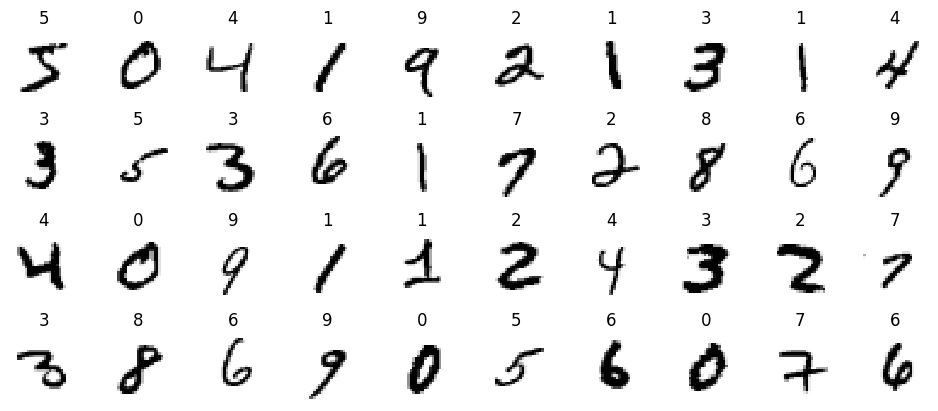

In [18]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X.iloc[index].to_numpy().reshape(28,28), cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Without normalization

In [43]:
X, y = X_org, y_org
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

s = SVC(C=2, degree=9)
s.fit(X_train, y_train)

SVC(C=2, degree=9)

In [24]:
s_test_predict = s.predict(X_test)

accuracy 0.9838571428571429


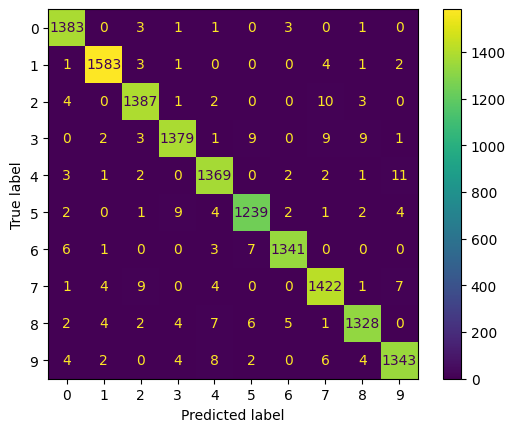

In [29]:
print_metrics(s, s_test_predict, y_test)

# 

# With normalization

In [31]:
X = normalize(X_org)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

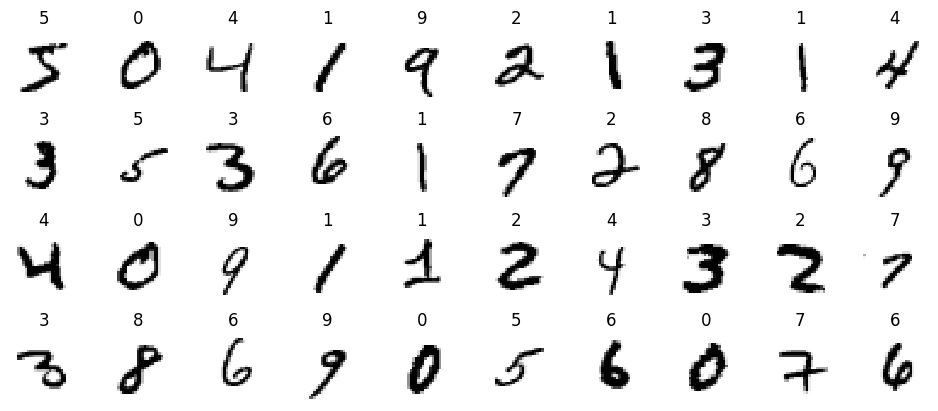

In [37]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X[index].reshape(28,28), cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [38]:
sn = SVC(C=2, degree=9)
sn.fit(X_train, y_train)

SVC(C=2, degree=9)

In [41]:
sn_test_predict = sn.predict(X_test)

accuracy 0.9828571428571429


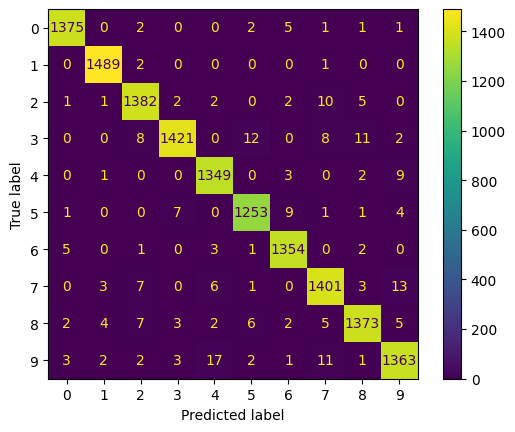

In [42]:
print_metrics(sn, sn_test_predict, y_test)

Results with scaling were much worse.

# Grid search

In [19]:
X, y = X_org, y_org
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

### RBF

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid_rbf = {
    "C": [2,5,10],
    "degree": [9,10],
    "kernel": ["rbf"]
}

gs_rbf = GridSearchCV(SVC(), param_grid_rbf, n_jobs=-1, verbose=2)
gs_rbf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..........................C=2, degree=9, kernel=rbf; total time= 6.2min
[CV] END ..........................C=2, degree=9, kernel=rbf; total time= 6.2min
[CV] END ..........................C=2, degree=9, kernel=rbf; total time= 8.1min
[CV] END ..........................C=2, degree=9, kernel=rbf; total time= 6.7min
[CV] END ..........................C=2, degree=9, kernel=rbf; total time= 6.9min
[CV] END .........................C=2, degree=10, kernel=rbf; total time= 8.0min
[CV] END .........................C=2, degree=10, kernel=rbf; total time= 8.3min
[CV] END .........................C=2, degree=10, kernel=rbf; total time= 8.3min
[CV] END .........................C=2, degree=10, kernel=rbf; total time= 7.6min
[CV] END .........................C=2, degree=10, kernel=rbf; total time= 7.3min
[CV] END ..........................C=5, degree=9, kernel=rbf; total time= 4.1min
[CV] END ..........................C=5, degree=9,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [2, 5, 10], 'degree': [9, 10], 'kernel': ['rbf']},
             verbose=2)

```
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..........................C=2, degree=9, kernel=rbf; total time= 6.2min
[CV] END ..........................C=2, degree=9, kernel=rbf; total time= 6.2min
[CV] END ..........................C=2, degree=9, kernel=rbf; total time= 8.1min
[CV] END ..........................C=2, degree=9, kernel=rbf; total time= 6.7min
[CV] END ..........................C=2, degree=9, kernel=rbf; total time= 6.9min
[CV] END .........................C=2, degree=10, kernel=rbf; total time= 8.0min
[CV] END .........................C=2, degree=10, kernel=rbf; total time= 8.3min
[CV] END .........................C=2, degree=10, kernel=rbf; total time= 8.3min
[CV] END .........................C=2, degree=10, kernel=rbf; total time= 7.6min
[CV] END .........................C=2, degree=10, kernel=rbf; total time= 7.3min
[CV] END ..........................C=5, degree=9, kernel=rbf; total time= 4.1min
[CV] END ..........................C=5, degree=9, kernel=rbf; total time= 4.3min
[CV] END ..........................C=5, degree=9, kernel=rbf; total time= 5.1min
[CV] END ..........................C=5, degree=9, kernel=rbf; total time= 7.0min
[CV] END ..........................C=5, degree=9, kernel=rbf; total time= 7.7min
[CV] END .........................C=5, degree=10, kernel=rbf; total time= 5.7min
[CV] END .........................C=5, degree=10, kernel=rbf; total time= 3.8min
[CV] END .........................C=5, degree=10, kernel=rbf; total time= 3.8min
[CV] END .........................C=5, degree=10, kernel=rbf; total time= 3.9min
[CV] END .........................C=5, degree=10, kernel=rbf; total time= 3.8min
[CV] END .........................C=10, degree=9, kernel=rbf; total time= 4.2min
[CV] END .........................C=10, degree=9, kernel=rbf; total time= 3.9min
[CV] END .........................C=10, degree=9, kernel=rbf; total time= 6.5min
[CV] END .........................C=10, degree=9, kernel=rbf; total time= 6.4min
[CV] END .........................C=10, degree=9, kernel=rbf; total time= 6.6min
[CV] END ........................C=10, degree=10, kernel=rbf; total time= 6.7min
[CV] END ........................C=10, degree=10, kernel=rbf; total time= 6.2min
[CV] END ........................C=10, degree=10, kernel=rbf; total time= 3.7min
[CV] END ........................C=10, degree=10, kernel=rbf; total time= 3.6min
[CV] END ........................C=10, degree=10, kernel=rbf; total time= 4.0min
```

In [22]:
save_model(gs_rbf, "svm_grid_search_rbf.sav")

In [23]:
gs_rbf.best_params_

{'C': 10, 'degree': 9, 'kernel': 'rbf'}

`{'C': 10, 'degree': 9, 'kernel': 'rbf'}`

In [25]:
gs_rbf_test_predict = gs_rbf.predict(X_test)

accuracy 0.9850714285714286


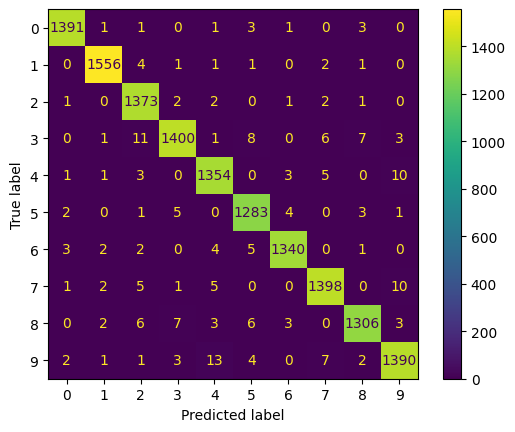

In [26]:
print_metrics(gs_rbf, gs_rbf_test_predict, y_test)

### Poly

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid_poly = {
    "C": [2,5,10],
    "degree": [9,10],
    "kernel": ["poly"]
}

gs_poly = GridSearchCV(SVC(), param_grid_poly, n_jobs=-1, verbose=2)
gs_poly.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .........................C=2, degree=9, kernel=poly; total time=13.0min
[CV] END .........................C=2, degree=9, kernel=poly; total time= 9.8min
[CV] END .........................C=2, degree=9, kernel=poly; total time= 8.8min
[CV] END .........................C=2, degree=9, kernel=poly; total time=12.1min
[CV] END .........................C=2, degree=9, kernel=poly; total time=10.6min
[CV] END ........................C=2, degree=10, kernel=poly; total time=10.0min
[CV] END ........................C=2, degree=10, kernel=poly; total time=10.1min
[CV] END ........................C=2, degree=10, kernel=poly; total time=10.0min
[CV] END ........................C=2, degree=10, kernel=poly; total time=10.0min
[CV] END ........................C=2, degree=10, kernel=poly; total time= 9.8min
[CV] END .........................C=5, degree=9, kernel=poly; total time= 7.5min
[CV] END .........................C=5, degree=9, 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [2, 5, 10], 'degree': [9, 10],
                         'kernel': ['poly']},
             verbose=2)

In [28]:
save_model(gs_poly, "svm_grid_search_poly.sav")

In [29]:
gs_poly.best_params_

{'C': 10, 'degree': 9, 'kernel': 'poly'}

In [30]:
gs_poly_test_predict = gs_poly.predict(X_test)

accuracy 0.8907142857142857


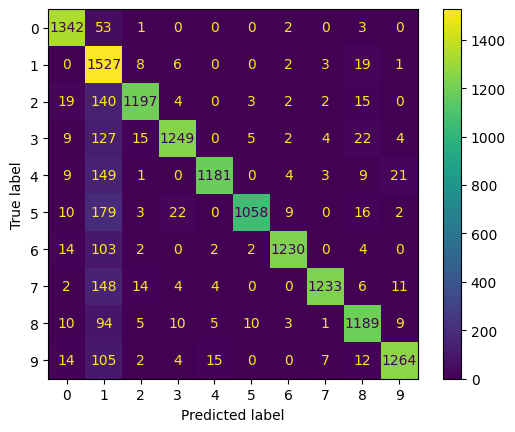

In [32]:
print_metrics(gs_poly, gs_poly_test_predict, y_test)